In [30]:
# install required packages
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy 


In [31]:
# import functions
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 20]

from helpers import load_csv

In [32]:
# load data in numpy structured array
data = load_csv("dataset/train.csv")

In [33]:
# convert to pandas dataframe for vis
df = pd.DataFrame(data).set_index('Id')

In [34]:
# show df
df

Prediction  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
Id                                                                            
100000           1       138.470                       51.655        97.827   
100001           0       160.937                       68.768       103.235   
100002           0      -999.000                      162.172       125.953   
100003           0       143.905                       81.417        80.943   
100004           0       175.864                       16.915       134.805   
...            ...           ...                          ...           ...   
349995           0      -999.000                       71.989        36.548   
349996           0      -999.000                       58.179        68.083   
349997           1       105.457                       60.526        75.839   
349998           0        94.951                       19.362        68.812   
349999           0      -999.000                       72.756        70.831   

        DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
Id                                                                              
100000    27.980                  0.91           124.711                2.666   
100001    48.146               -999.00          -999.000             -999.000   
100002    35.635               -999.00          -999.000             -999.000   
100003     0.414               -999.00          -999.000             -999.000   
100004    16.405               -999.00          -999.000             -999.000   
...          ...                   ...               ...                  ...   
349995     5.042               -999.00          -999.000             -999.000   
349996    22.439               -999.00          -999.000             -999.000   
349997    39.757               -999.00          -999.000             -999.000   
349998    13.504               -999.00          -999.000             -999.000   
349999     7.479               -999.00          -999.000             -999.000   

        DER_deltar_tau_lep  DER_pt_tot  ...  PRI_met_phi  PRI_met_sumet  \
Id                                      ...                               
100000               3.064      41.928  ...       -0.277        258.733   
100001               3.473       2.078  ...       -1.916        164.546   
100002               3.148       9.336  ...       -2.186        260.414   
100003               3.310       0.414  ...        0.060         86.062   
100004               3.891      16.405  ...       -0.871         53.131   
...                    ...         ...  ...          ...            ...   
349995               1.392       5.042  ...        2.859        144.665   
349996               2.585      22.439  ...       -0.867         80.408   
349997               2.390      22.183  ...       -2.890        198.907   
349998               3.365      13.504  ...        0.811        112.718   
349999               2.025       7.479  ...       -1.596         99.405   

        PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
Id                                                             
100000            2              67.435                2.150   
100001            1              46.226                0.725   
100002            1              44.251                2.053   
100003            0            -999.000             -999.000   
100004            0            -999.000             -999.000   
...             ...                 ...                  ...   
349995            0            -999.000             -999.000   
349996            0            -999.000             -999.000   
349997            1              41.992                1.800   
349998            0            -999.000             -999.000   
349999            0            -999.000             -999.000   

        PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
Id                                     

In [35]:
df['Prediction'].value_counts()

0    164333
1     85667
Name: Prediction, dtype: int64

## Boxplot of all features

<IPython.core.display.Javascript object>


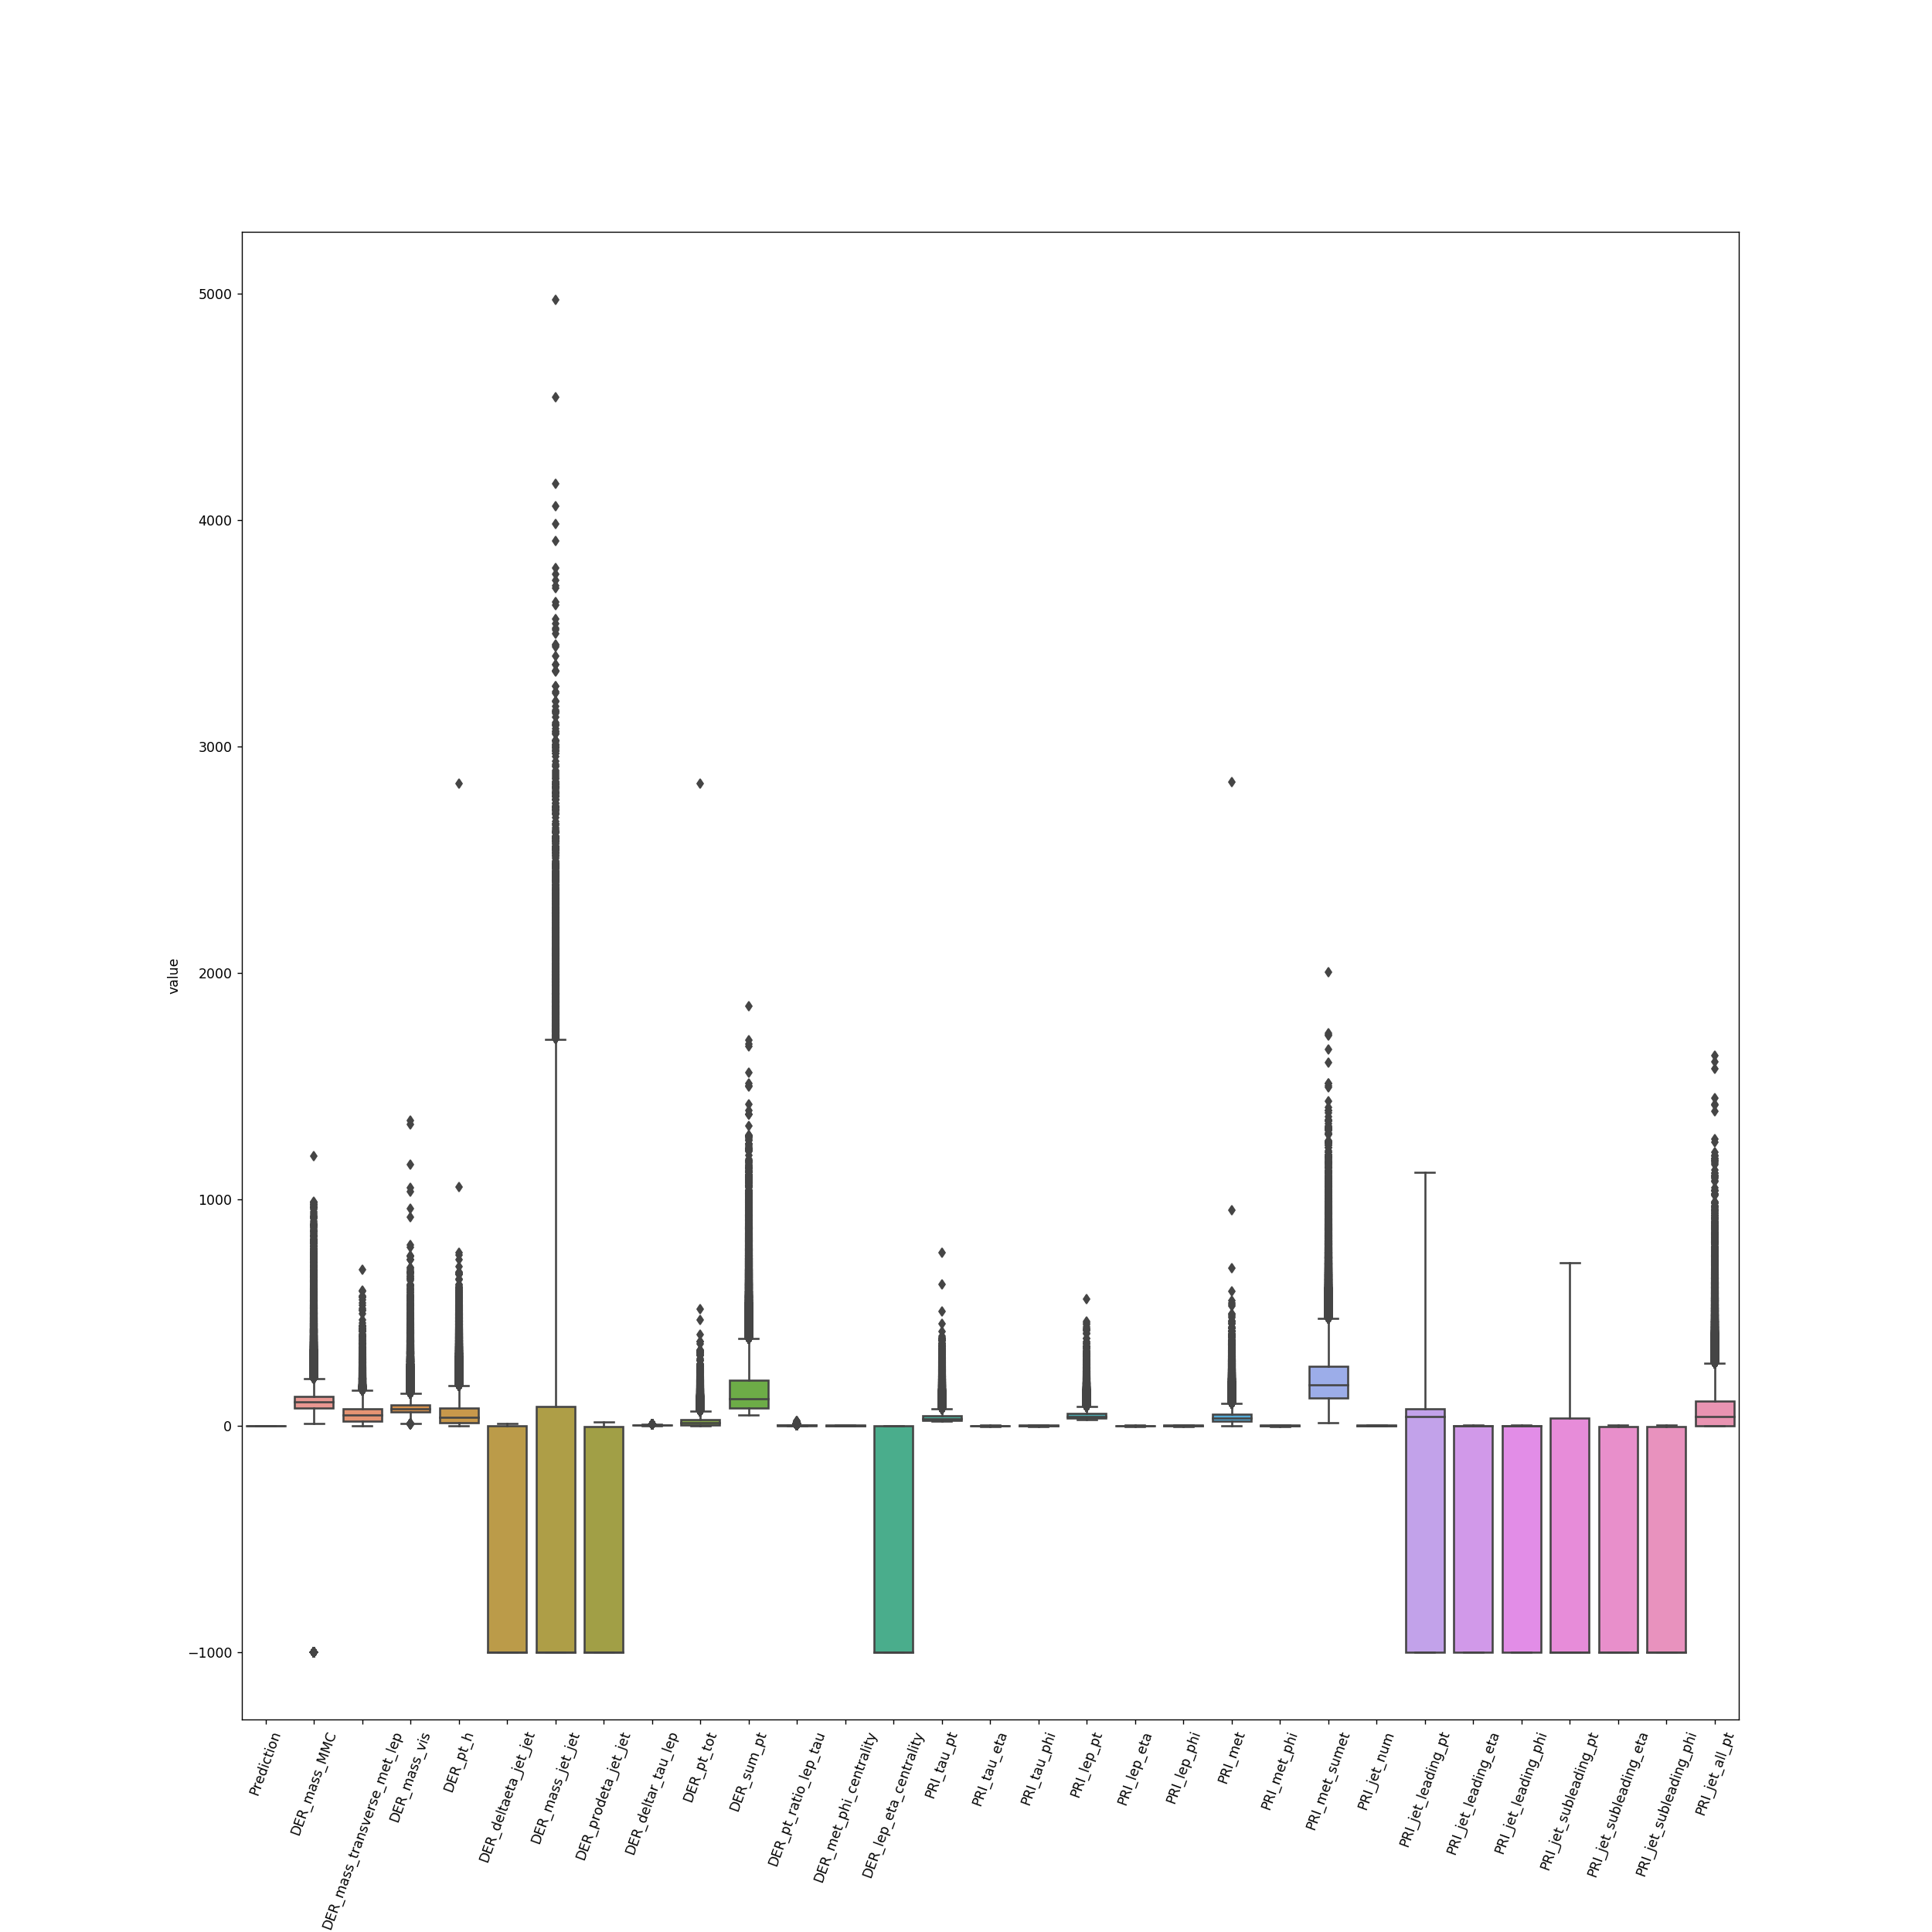

In [24]:
g = sns.boxplot(x="variable", y="value", data=pd.melt(df))
g.set_xticklabels(g.get_xticklabels(),rotation=70)

plt.show()
#plt.savefig("EDA/boxplot.png")

## Histograms by prediction value

<IPython.core.display.Javascript object>


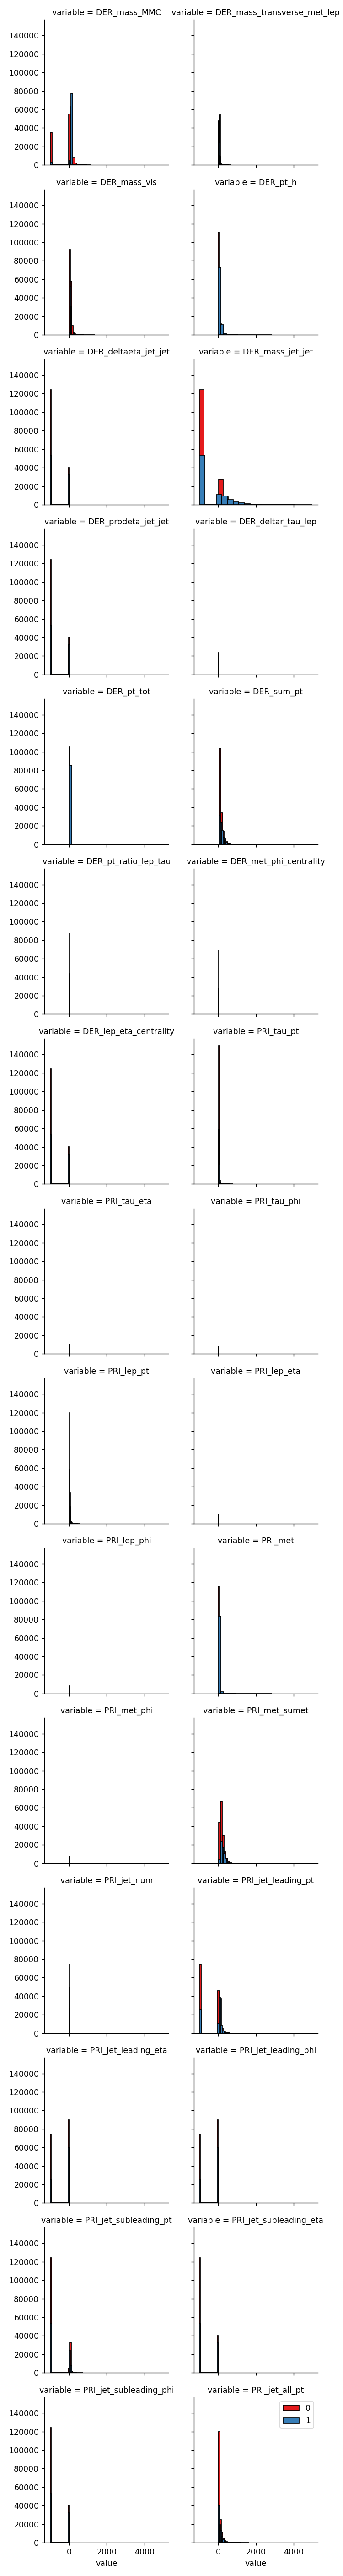

In [43]:
df2 = pd.melt(df, id_vars='Prediction')

bins=np.linspace(df2.value.min(), df2.value.max(), 100)
g = sns.FacetGrid(df2, col="variable", hue="Prediction", palette="Set1", col_wrap=2)
g.map(plt.hist, 'value', bins=20, ec="k")

g.axes[-1].legend()
plt.show()

## Correlation Heatmap

<IPython.core.display.Javascript object>


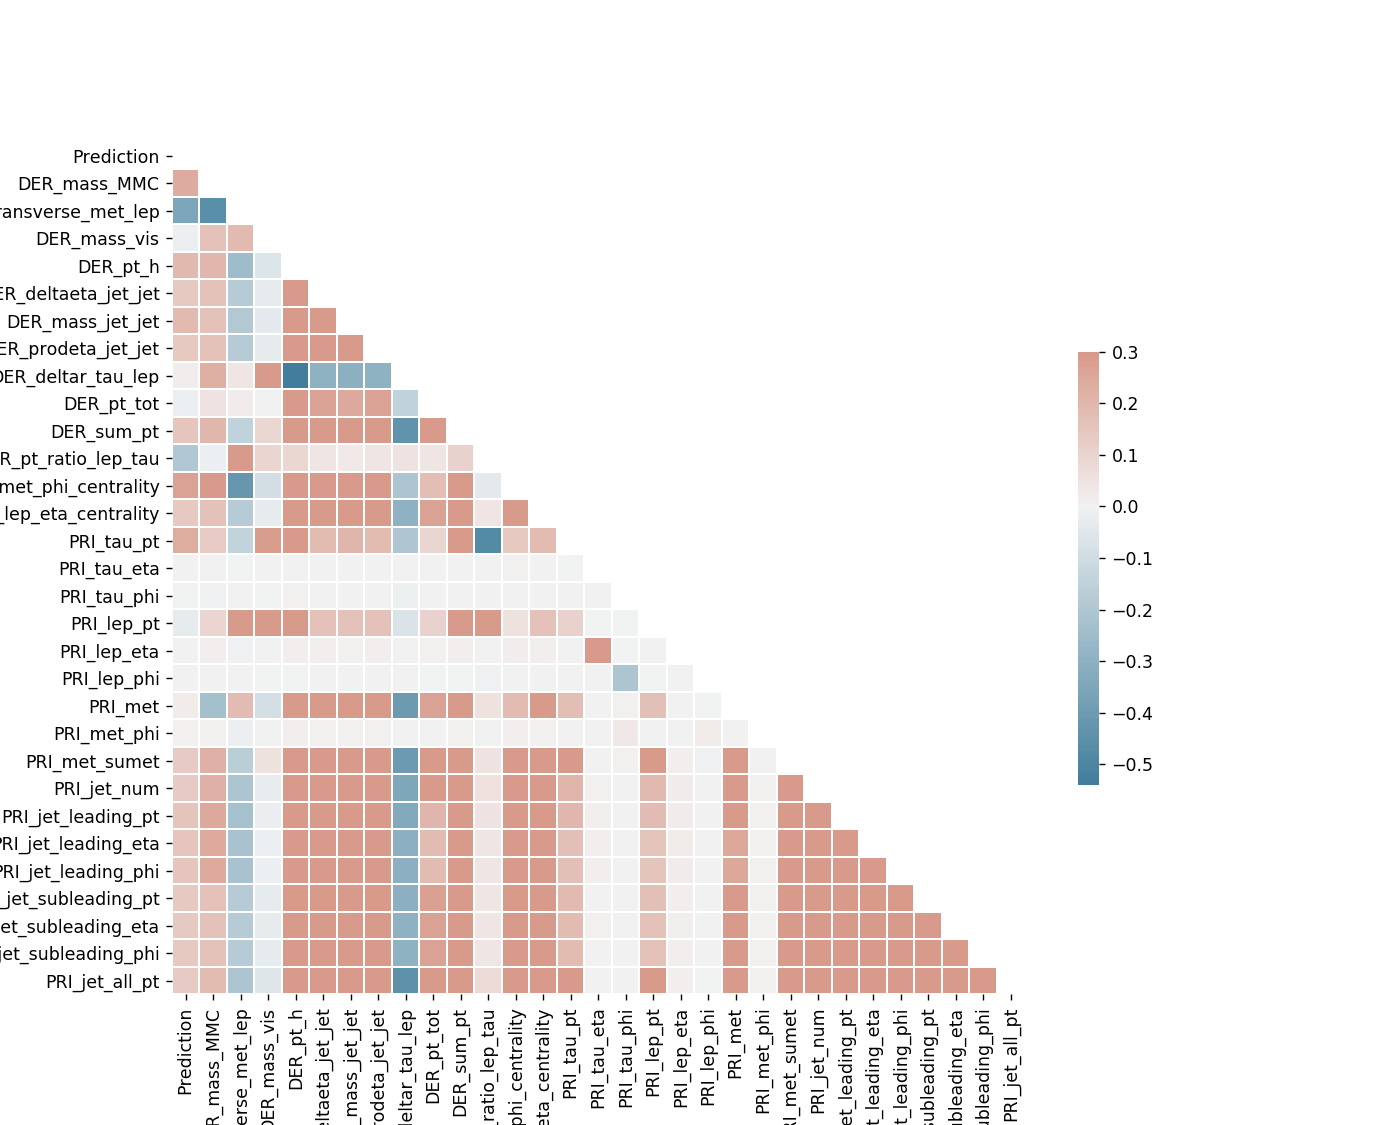

In [27]:

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.savefig("EDA/heatmap.png")